In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Создадим фиктивную тестовую выборку.

In [580]:
data = pd.read_csv('Parkinson/parkinsons_data.csv')

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='status'),
                                                   data.status,
                                                   test_size=0.2,
                                                   stratify=data.status)

train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

train.to_csv('parkinsons_train_data.csv', index=False)
test.drop(columns='status').to_csv('parkinsons_test_data.csv', index=False)

- name - имя субъекта ASCII и номер записи
- MDVP: Fo (Hz) - Средняя основная частота голоса
- MDVP: Fhi (Hz) - Максимальная основная частота голоса
- MDVP: Flo (Гц) - Минимальная основная частота голоса
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP  - несколько мер изменения основной частоты
- MDVP: Shimmer, MDVP: Shimmer (дБ), Shimmer: APQ3, Shimmer: APQ5, MDVP: APQ, Shimmer: DDA -несколько показателей изменения амплитуды
- NHR, HNR - два показателя отношения шума к тональным компонентам в голосе.
- RPDE, D2 - две нелинейные динамические меры сложности
- DFA - показатель масштабирования фрактального сигнала
- spread1, spread2, PPE - Три нелинейных показателя изменения основной частоты

- status - Состояние здоровья обследуемого (один) - Паркинсонизм, (ноль) - здоров

In [581]:
train_data = pd.read_csv('parkinsons_train_data.csv')
test_data = pd.read_csv('parkinsons_test_data.csv')

In [582]:
train_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S13_4,126.344,134.231,112.773,0.00448,0.00004,0.00131,0.00169,0.00393,0.02033,...,0.03429,0.00474,25.030,0.507504,0.760361,-6.689151,0.291954,2.431854,0.105993,0
1,phon_R01_S21_5,173.898,211.350,74.677,0.00448,0.00003,0.00237,0.00254,0.00710,0.06727,...,0.11363,0.04214,14.739,0.599371,0.743937,-5.783272,0.299793,3.007096,0.194052,1
2,phon_R01_S42_1,236.200,244.663,102.137,0.00277,0.00001,0.00154,0.00153,0.00462,0.02448,...,0.04231,0.00620,24.078,0.469928,0.628232,-6.816086,0.172270,2.235197,0.119652,0
3,phon_R01_S33_6,116.150,131.731,109.815,0.00381,0.00003,0.00181,0.00232,0.00542,0.03026,...,0.04543,0.01827,18.801,0.624811,0.696049,-5.866357,0.233070,2.445646,0.184985,1
4,phon_R01_S19_1,120.080,139.710,111.208,0.00405,0.00003,0.00180,0.00220,0.00540,0.01706,...,0.02921,0.00442,25.742,0.495954,0.762959,-5.791820,0.329066,2.205024,0.188180,1


In [583]:
train_data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [584]:
test_data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Проверка на дубликаты.

In [585]:
index_unique = len(set(train_data['name']))
index_total = train_data.shape[0]
index_duplicate = index_total - index_unique
print("There are " + str(index_duplicate) + " duplicate IDs for " + str(index_total) + " total entries")

There are 0 duplicate IDs for 156 total entries


In [586]:
features = train_data.drop(columns=['name', 'status'])
target = train_data.status

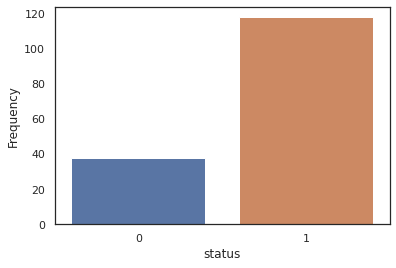

In [587]:
ax = sns.countplot(x = target)
ax.set_xlabel('status')
ax.set_ylabel('Frequency')
plt.show()

In [588]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       156 non-null    float64
 1   MDVP:Fhi(Hz)      156 non-null    float64
 2   MDVP:Flo(Hz)      156 non-null    float64
 3   MDVP:Jitter(%)    156 non-null    float64
 4   MDVP:Jitter(Abs)  156 non-null    float64
 5   MDVP:RAP          156 non-null    float64
 6   MDVP:PPQ          156 non-null    float64
 7   Jitter:DDP        156 non-null    float64
 8   MDVP:Shimmer      156 non-null    float64
 9   MDVP:Shimmer(dB)  156 non-null    float64
 10  Shimmer:APQ3      156 non-null    float64
 11  Shimmer:APQ5      156 non-null    float64
 12  MDVP:APQ          156 non-null    float64
 13  Shimmer:DDA       156 non-null    float64
 14  NHR               156 non-null    float64
 15  HNR               156 non-null    float64
 16  RPDE              156 non-null    float64
 1

In [589]:
features.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,153.186391,189.983167,115.373365,0.006040,0.000043,0.003219,0.003345,0.009656,0.029803,0.279923,...,0.024304,0.047125,0.024297,21.799782,0.502679,0.717079,-5.717054,0.221383,2.380845,0.204220
std,40.507478,81.772569,42.465926,0.004461,0.000033,0.002728,0.002504,0.008183,0.018633,0.187373,...,0.017129,0.029949,0.037704,4.475665,0.106546,0.052775,1.044477,0.080247,0.378717,0.086939
min,91.904000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009580,0.085000,...,0.007260,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.018689,1.423287,0.044539
25%,117.170500,135.361250,83.805750,0.003328,0.000020,0.001645,0.001840,0.004933,0.016538,0.150250,...,0.013097,0.024540,0.005803,18.998250,0.425816,0.675637,-6.456900,0.164276,2.107431,0.137982
50%,148.367000,167.760000,104.544000,0.004920,0.000035,0.002425,0.002750,0.007270,0.023525,0.223500,...,0.018415,0.038595,0.012295,22.075500,0.498505,0.720912,-5.716036,0.214778,2.352425,0.195294
75%,180.393000,217.479250,136.028250,0.007405,0.000050,0.003895,0.003965,0.011690,0.037778,0.351250,...,0.030602,0.060707,0.026380,25.239750,0.596659,0.757686,-5.152385,0.266741,2.632503,0.246137
max,260.105000,592.030000,237.303000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [590]:
i=0
corr = features.corr()
col1, col2, col3 = [], [], []
for col in corr.columns:
    i+=1
    for index in corr.index[i:]:
        if corr[col][index]>=0.9:
            col1.append(col)
            col2.append(index)
            col3.append(np.round(corr[col][index], 2))
        
corr = pd.DataFrame()
corr["feature_1"] = col1
corr["feature_2"] = col2
corr["correlation"] = col3

corr.sort_values(by='correlation', ascending=False).reset_index(drop=True)

,feature_1,feature_2,correlation
0,Shimmer:APQ3,Shimmer:DDA,1.00
1,MDVP:RAP,Jitter:DDP,1.00
2,MDVP:Jitter(%),Jitter:DDP,0.99
3,MDVP:Shimmer,MDVP:Shimmer(dB),0.99
4,MDVP:Shimmer,Shimmer:APQ3,0.99
5,MDVP:Jitter(%),MDVP:RAP,0.99
6,MDVP:Shimmer,Shimmer:DDA,0.99
7,MDVP:Shimmer,Shimmer:APQ5,0.98
8,MDVP:Shimmer(dB),Shimmer:APQ5,0.98
9,MDVP:Jitter(%),MDVP:PPQ,0.97


In [591]:
features['Jitter:DDP__^3'] = features['Jitter:DDP']**3
features['MDVP:Jitter(Abs)__^5'] = features['MDVP:Jitter(Abs)']**5
features['Shimmer:DDA__^2'] = features['Shimmer:DDA']**2

features.drop(columns=['Shimmer:APQ3',
                       'MDVP:RAP',
                       'MDVP:Shimmer',
                       'MDVP:Jitter(%)',
                       'MDVP:Shimmer(dB)',
                       'MDVP:PPQ',
                       'spread1',
                       'Shimmer:APQ5',
                       'Jitter:DDP',
                       'MDVP:Jitter(Abs)',
                       'Shimmer:DDA'],
                    inplace=True)

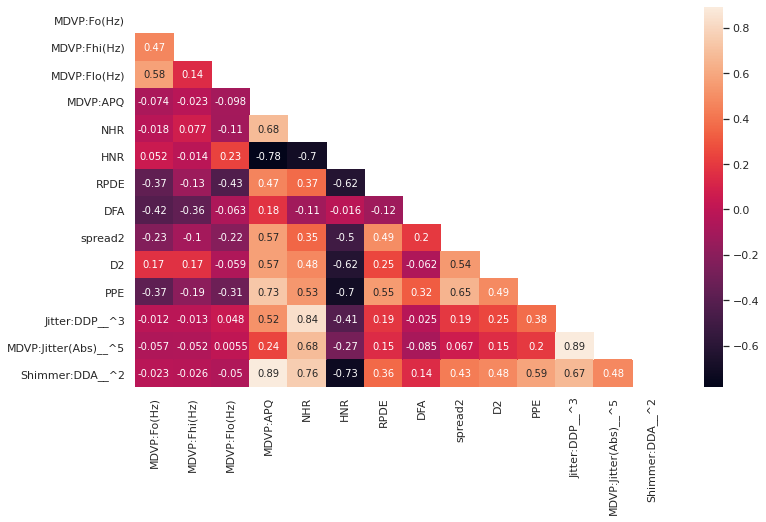

In [592]:
corr = features.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12,7))
    ax = sns.heatmap(corr, mask=mask, annot=True)

In [593]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features,
                                                   target,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=target)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [594]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix

str_kfold = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)

metrics = pd.DataFrame({"score_type":["precision", "recall", "f1", "conf_metrix"]})
metrics.set_index("score_type")

def quality_model(model, model_name):
    
    metrics[model_name] = [np.round(np.mean(cross_val_score(model, X_train_scaled, y_train, cv=str_kfold, scoring="precision")),3),
                            np.round(np.mean(cross_val_score(model, X_train_scaled, y_train, cv=str_kfold, scoring="recall")),3),
                            np.round(np.mean(cross_val_score(model, X_train_scaled, y_train, cv=str_kfold, scoring="f1")),3),
                            confusion_matrix(y_test, model.predict(X_test_scaled))
                          ]
    return metrics

In [595]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

svm = SVC(kernel='linear',random_state=0)
knn = KNeighborsClassifier()
rand_forest = RandomForestClassifier(min_samples_split=2,
                                    min_samples_leaf=3,
                                     max_features=None,
                                     random_state=0)


for model, model_name in zip([svm, knn, rand_forest], ["svm", "knn", "random_forest"]):
    model.fit(X_train_scaled, y_train)
    quality_model(model, model_name)
metrics

,score_type,svm,knn,random_forest
0,precision,0.84,0.865,0.893
1,recall,0.903,0.927,0.902
2,f1,0.87,0.894,0.896
3,conf_metrix,"[[6, 5], [4, 32]]","[[9, 2], [1, 35]]","[[6, 5], [1, 35]]"


In [596]:
svm_params = dict(
    C=[0.01, 0.1, 0.5, 1, 10],
    gamma=[0.01,0.1,1,10,100])

knn_params = dict(n_neighbors=[3,5,7,9,11,15],
    p=[1,2],
    algorithm = ['ball_tree', 'kd_tree', 'brute']
    
)
rf_params = dict(n_estimators=[70,100,120,150],
            criterion=['gini','entropy'],
            max_depth=[3,4,5,6]
    )

In [597]:
from sklearn.model_selection import GridSearchCV

for model, model_params, model_name in zip([svm, knn, rand_forest],
                                           [svm_params, knn_params, rf_params],
                                           ["best_svm", "best_knn", "best_rf"]):
    
    gs = GridSearchCV(model, model_params, cv=str_kfold, scoring="f1", n_jobs=-1)
    gs_result = gs.fit(X_train_scaled, y_train)                     
    
    quality_model(gs_result.best_estimator_, model_name)
    print(f'{model_name} params: ', gs_result.best_params_)

best_svm params:  {'C': 0.1, 'gamma': 0.01}
best_knn params:  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2}
best_rf params:  {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 100}


In [598]:
metrics

,score_type,svm,knn,random_forest,best_svm,best_knn,best_rf
0,precision,0.84,0.865,0.893,0.849,0.928,0.903
1,recall,0.903,0.927,0.902,0.963,0.939,0.963
2,f1,0.87,0.894,0.896,0.902,0.933,0.931
3,conf_metrix,"[[6, 5], [4, 32]]","[[9, 2], [1, 35]]","[[6, 5], [1, 35]]","[[6, 5], [3, 33]]","[[9, 2], [1, 35]]","[[6, 5], [1, 35]]"


In [600]:
params = {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2}

knn = KNeighborsClassifier(**params).fit(X_train_scaled, y_train)

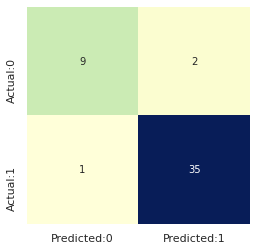

In [601]:
cm = confusion_matrix(y_test, knn.predict(X_test_scaled))
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (4,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False);